In [1]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras
from keras import models
from keras import layers
from keras import regularizers
import tensorflow as tf
print (keras.__version__)

Using TensorFlow backend.
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/lib/python3.7/site-packages/t

2.2.4


In [2]:
print(tf.__version__)

1.13.1


In [3]:
NB_WORDS = 10000  
VAL_SIZE = 1000 
NB_START_EPOCHS = 100
BATCH_SIZE = 512  

In [4]:
df = pd.read_csv('/Users/Duo/Downloads/NLP/billboardtop100_test.csv')#)
df = df.reindex(np.random.permutation(df.index))  
df = df[['lyrics', 'Tone']]
df.head(100)

,lyrics,Tone
4963,"[Intro: Cam'ron] Just blaze (Oh Baby) oh baby,...",Negative
4720,"[Intro: Trillville (Lil Jon)] (What, ugh) Get ...",Negative
4515,Here we stand Somewhere in between this moment...,Normal
5608,"[Intro] Yellow City, yea.. Benzino, yea Yellow...",Normal
2762,"[Chorus] In the night, I hear 'em talk, the co...",Normal
6506,"Duffle bag, backseat My dash, your feet Those ...",Normal
3719,[Intro: 6ix9ine] Scum Gang! AM Nation [Chorus ...,Negative
2573,"[Intro: Ciara] My goodies, my goodies, my good...",Negative
5315,"Throw it up, throw it up Watch it all fall out...",Negative
506,[Verse 1] They say this town The stars stay up...,Normal


In [5]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Duo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df.lyrics = df.lyrics.apply(remove_stopwords).apply(remove_mentions)
df.head()

,lyrics,Tone
4963,"[Intro: Cam'ron] Just blaze (Oh Baby) oh baby,...",Negative
4720,"[Intro: Trillville (Lil Jon)] (What, ugh) Get ...",Negative
4515,Here stand Somewhere moment end Will bend Or o...,Normal
5608,"[Intro] Yellow City, yea.. Benzino, yea Yellow...",Normal
2762,"[Chorus] In night, hear 'em talk, coldest stor...",Normal


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.lyrics, df.Tone, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 7146
# Test data samples: 795


In [9]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

In [10]:
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 10 most common words are:', collections.Counter(tk.word_counts).most_common(10))

Fitted tokenizer on 7146 documents
10000 words in dictionary
Top 10 most common words are: [("i'm", 34768), ('like', 25705), ('you', 23397), ('and', 22365), ('yeah', 22240), ('know', 20788), ('oh', 20193), ('got', 18184), ('no', 17441), ('get', 16215)]


In [11]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)
print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

"Uh uh uh gotta bring attention dirty, that's all.. You better watch talkin bout; runnin mouth, like know You gon' fuck around show "Show Me" get called "Show Me" Why one-on-one can't hold last name Hanes Only way wear stitch name pants No resident France; swear I'm Paris Hundred-six karats total? Naw that's per wrist Trying compurr chain yo' chain I'm like Sprint Motorola no service, range You brains, thinkin I'mma shout name You gotta come better ways catch fame All pressure applyin time ease Before hit blindside takin sleeves As much we's floss, still hard please boss Don't lyin bitchin cryin suck loss Cause your, acts wack, whole label wack And matter fact, eh eh-eh eh a-hold [Hook] I.. am.. #1 no matter like Here take sit write I.. am.. number one Hey hey hey hey hey hey let ask man What take #1? not winner three nobody remembers (hey) What take #1? Hey hey hey hey.. Do like shake ya, daddy? Move around? Let get peep touches ground? Hell yeah love girl that's willin learn Willin g

In [12]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

In [13]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 1165, 1, 297, 8074, 184, 644, 178, 1002, 8, 2508, 5006, 1165, 2449, 1121, 1967, 66, 208, 15, 9, 3372, 3107, 1016, 35, 1133, 1143, 152, 1165, 4696, 515, 515, 123, 131, 8405, 11, 52, 1371, 343, 562, 154, 10, 219, 515, 515, 123, 131, 8405, 11, 52, 1371, 343, 562, 154, 10, 219, 1538, 26, 559, 1538, 3719, 1165, 1568, 8406, 67, 119, 643, 6, 49, 397, 493, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 297, 1162, 1, 9352, 6832, 1, 4448, 1774, 6414, 911, 3666, 5683, 66, 147, 1384, 29, 1, 2554, 17, 541, 1051, 624, 127, 48, 1538, 26, 559, 1538, 3719, 1165, 1568, 8406, 67, 119, 643, 6, 49, 397, 493, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69, 184, 295, 184, 152, 1165, 1, 297, 1162, 184, 69]" is converted into [0. 1. 0. ... 0. 0. 0

In [14]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"Negative" is converted into 0
"0" is converted into [1. 0.]


In [15]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (715, 10000)


In [16]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(2, activation='softmax'))
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


In [17]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history
base_history = deep_model(base_model)

Instructions for updating:
Use tf.cast instead.


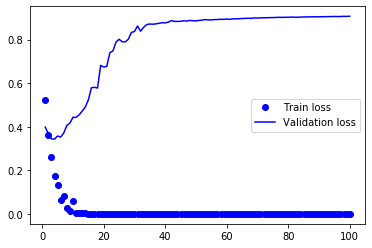

KeyError: 'accuracy'

In [18]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()
    
eval_metric(base_history, 'loss')
eval_metric(base_history, 'accuracy')

In [19]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(2, activation='softmax'))
reduced_model.summary()

reduced_history = deep_model(reduced_model)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 320,098
Trainable params: 320,098
Non-trainable params: 0
_________________________________________________________________


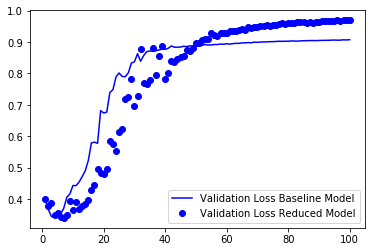

In [20]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'b', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'bo', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()
    
compare_loss_with_baseline(reduced_history, 'Reduced Model')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


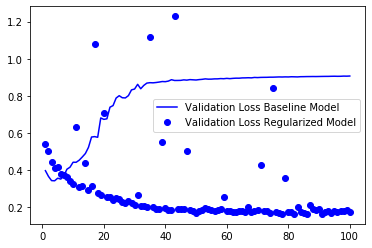

In [21]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(2, activation='softmax'))
reg_model.summary()
    
reg_history = deep_model(reg_model)
compare_loss_with_baseline(reg_history, 'Regularized Model')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 644,354
Trainable params: 644,354
Non-trainable params: 0
_________________________________________________________________


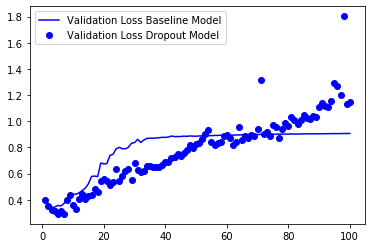

In [22]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(2, activation='softmax'))
drop_model.summary()

drop_history = deep_model(drop_model)

compare_loss_with_baseline(drop_history, 'Dropout Model')

In [35]:
print(reduced_model.name)

sequential_2


In [47]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    model.save_weights(str(model)+".h5")
    return results

base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))


795/795 [==============================] - 0s 282us/step
/n
Test accuracy of baseline model: 88.68%


In [49]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

795/795 [==============================] - 0s 99us/step
/n
Test accuracy of reduced model: 88.55%
795/795 [==============================] - 0s 219us/step
/n
Test accuracy of regularized model: 94.84%
795/795 [==============================] - 0s 114us/step
/n
Test accuracy of dropout model: 86.67%
